<a href="https://colab.research.google.com/github/sanskarahamana/APS-LAB/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Divide and Conquer (Sorting)

- **Created by Dr. Ajay

Write a python program to perform **Countingsort**.
* Statement:  Given a disordered list of repeated integers, rearrange the integers in natural order.
 Sample Input: [4,3,2,1,4,3,2,4,3,4]
 Sample Output: [1,2,2,3,3,3,4,4,4,4]

Time Complexity of Solution: Best Case O(n+k); Average Case O(n+k); Worst Case O(n+k), where n is the size of the input array and k means the values range from 0 to k.
- Approach:
Counting sort, like radix sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence counting sort is among the fastest sorting algorithms around, in theory. The  particular distinction for counting sort is that it creates a bucket for each value and keep a counter in each bucket. Then each time a value is encountered in the input collection, the appropriate counter is incremented. Because counting sort creates a bucket for each value, an imposing restriction is that the maximum value in the input array be known beforehand. Bucket sort uses a hash function to distribute values; counting sort, on the other hand, creates a counter for each value -- hence the name.
- Implementation notes:
1. Since the values range from 0 to k, create k+1 buckets.

2. To fill the buckets, iterate through the input list and
each time a value appears, increment the counter in its bucket.
3. Now fill the input list with the compressed data in the
buckets. Each bucket's key represents a value in the  array. So for each bucket, from smallest key to largest, add the index of the bucket to the input array and decrease the counter in said bucket by one; until the counter is zero.

--- Sample Input Test ---
Original Sample Input: [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
Sorted Sample Output:  [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]


--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000182 seconds
Input Size: 500, Running Time: 0.000215 seconds
Input Size: 1000, Running Time: 0.000266 seconds
Input Size: 2000, Running Time: 0.000336 seconds
Input Size: 5000, Running Time: 0.000743 seconds
Input Size: 10000, Running Time: 0.000920 seconds
Input Size: 20000, Running Time: 0.001898 seconds
Input Size: 50000, Running Time: 0.003652 seconds


--- Plotting Running Time ---


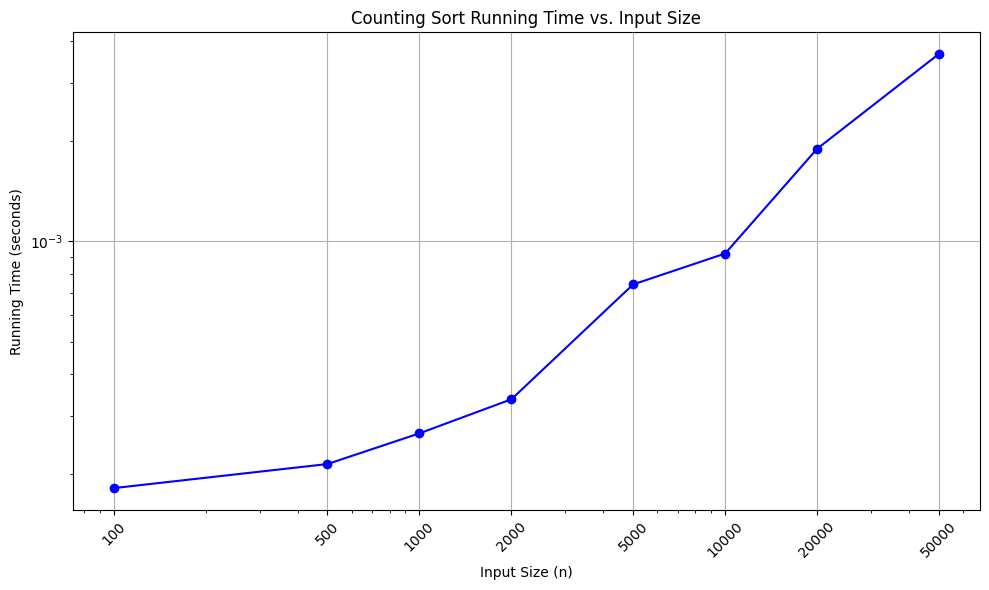

In [1]:
import time
import random
import matplotlib.pyplot as plt

def counting_sort(arr):
    """
    Implements the Counting Sort algorithm.
    Assumes input elements are non-negative integers.
    """
    if not arr: # Handle empty array case
        return []

    # 1. Find the maximum element (k)
    k = max(arr)

    # 2. Create k+1 buckets (count array) and initialize to zero
    count = [0] * (k + 1)

    # 3. Populate the count array
    for num in arr:
        count[num] += 1

    # 4. Reconstruct the sorted array
    sorted_arr = []
    for i in range(k + 1):
        sorted_arr.extend([i] * count[i])

    return sorted_arr

# --- Step 1, 2, 3: Test with sample input ---
print("--- Sample Input Test ---")
sample_input = [4, 3, 2, 1, 4, 3, 2, 4, 3, 4]
print(f"Original Sample Input: {sample_input}")
sorted_sample = counting_sort(sample_input)
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")

# --- Step 4: Measure Running Time ---
print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []
max_value_k = 1000 # Keeping k within a reasonable range for Counting Sort

for size in input_sizes:
    # Generate a random list for the current input size
    # Values are between 0 and max_value_k to control the range for counting sort
    random_list = [random.randint(0, max_value_k) for _ in range(size)]

    start_time = time.time()
    counting_sort(random_list)
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")

# --- Step 5: Plot Running Time ---
print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='b')
plt.title('Counting Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log') # Use log scale for better visualization of varying input sizes
plt.yscale('log') # Use log scale for better visualization of varying running times
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#write code for above cell and compute the running time and also plot graph.

 - *Bucketsort*
Statement:
Given a disordered list of integers, rearrange them in natural order.
 Sample Input: [8,5,3,1,9,6,0,7,4,2,5]
 Sample Output: [0,1,2,3,4,5,6,7,8,9,5]
Time Complexity of Solution:
Best Case O(n); Average Case O(n); Worst Case O(n).
- Approach:
If it sounds too good to be true, then most likely it's not true. Bucketsort is not an exception to this adage. For bucketsort to
work at its blazing efficiency, there are multiple prerequisites.
First the hash function that is used to partition the elements need
to be very good and must produce ordered hash: if i < k then
hash(i) < hash(k). Second, the elements to be sorted must be
uniformly distributed.
  The aforementioned aside, bucket sort is actually very good
considering that counting sort is reasonably speaking its upper
bound. And counting sort is very fast. The particular distinction
for bucket sort is that it uses a hash function to partition the
keys of the input array, so that multiple keys may hash to the same
bucket. Hence each bucket must effectively be a growable list;
similar to radix sort.


In [2]:
import time
import random
import matplotlib.pyplot as plt

def bucket_sort(arr):
    if not arr:
        return []

    # Determine the number of buckets and bucket size
    min_val = min(arr)
    max_val = max(arr)

    # If all elements are the same, return the array as is
    if min_val == max_val:
        return arr

    # Number of buckets is chosen to be sqrt(n) or a fixed number, here 10
    # or based on the range of values if it's small.
    # Let's use a simple approach for distributing values into buckets
    # The range is (max_val - min_val)
    # We'll create a fixed number of buckets, say 10, or based on the data spread.
    # A common approach is to make each bucket handle a certain range.

    # Let's use 10 buckets for simplicity, or num_buckets = len(arr) // 2 for better distribution if array is large
    num_buckets = 10
    if len(arr) > 20: # Adjust number of buckets for larger arrays
        num_buckets = int(len(arr)**0.5) # A common heuristic for number of buckets

    # Ensure at least one bucket if num_buckets becomes 0 due to small len(arr)
    if num_buckets == 0:
        num_buckets = 1

    buckets = [[] for _ in range(num_buckets)]

    # Calculate the range for each bucket
    # We add 1 to max_val to ensure max_val itself falls into a valid bucket index
    # when range_per_bucket is used as divisor for index calculation.
    # Or, handle the edge case for max_val carefully.

    # A more robust way to calculate bucket index:
    # (element - min_val) * num_buckets / (max_val - min_val + 1)

    range_of_values = max_val - min_val
    if range_of_values == 0:
        # All elements are the same, this case should be handled by the early exit
        # but for robustness within the loop, if range_of_values becomes 0 for some reason
        # this prevents division by zero.
        return arr # Already sorted if all elements are identical

    for num in arr:
        # Calculate bucket index
        # Ensure index is within bounds [0, num_buckets-1]
        # The +1 in the denominator helps ensure max_val gets an index less than num_buckets
        bucket_index = int((num - min_val) * num_buckets / (range_of_values + 1))
        buckets[bucket_index].append(num)

    # Sort each bucket and concatenate
    sorted_arr = []
    for bucket in buckets:
        # Use a stable sort for individual buckets, Python's Timsort is stable
        sorted_arr.extend(sorted(bucket))

    return sorted_arr

# --- Test with sample input ---
print("--- Sample Input Test ---")
sample_input = [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
print(f"Original Sample Input: {sample_input}")
sorted_sample = bucket_sort(sample_input)
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")


--- Sample Input Test ---
Original Sample Input: [8, 5, 3, 1, 9, 6, 0, 7, 4, 2, 5]
Sorted Sample Output:  [0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9]




--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000069 seconds
Input Size: 500, Running Time: 0.000233 seconds
Input Size: 1000, Running Time: 0.000305 seconds
Input Size: 2000, Running Time: 0.000598 seconds
Input Size: 5000, Running Time: 0.001702 seconds
Input Size: 10000, Running Time: 0.005945 seconds
Input Size: 20000, Running Time: 0.007442 seconds
Input Size: 50000, Running Time: 0.021223 seconds


--- Plotting Running Time ---


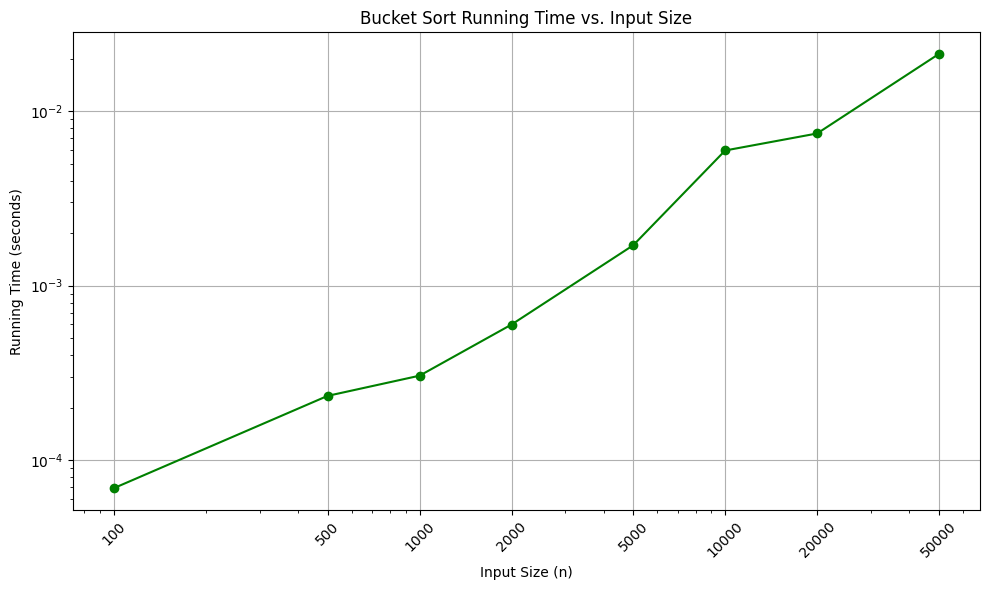

In [3]:
# --- Running Time Measurement ---
print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []
# For bucket sort, the range of values also matters.
# Let's keep the max value for random numbers relatively stable for comparison.
max_value_range = 1000 # Values will be from 0 to max_value_range

for size in input_sizes:
    # Generate a random list for the current input size
    random_list = [random.randint(0, max_value_range) for _ in range(size)]

    start_time = time.time()
    bucket_sort(random_list)
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")

# --- Plotting Running Time ---
print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='g')
plt.title('Bucket Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log') # Use log scale for better visualization of varying input sizes
plt.yscale('log') # Use log scale for better visualization of varying running times
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()

**Radix sort**
Statement:Given a disordered list of integers, rearrange them in natural order.
Sample Input: [18,5,100,3,1,19,6,0,7,4,2]
Sample Output: [0,1,2,3,4,5,6,7,18,19,100]
Time Complexity of Solution:Best Case O(kn); Average Case O(kn); Worst Case O(kn),where k is the length of the longest number and n is the size of the input array.Note: if k is greater than log(n) then an nlog(n) algorithm would be a better fit. In reality we can always change the radix to make k less than log(n).
- Approach: radix sort, like counting sort and bucket sort, is an integer based algorithm (i.e. the values of the input array are assumed to be integers). Hence radix sort is among the fastest sorting algorithms around, in theory. The particular distinction for radix sort is that it creates a bucket for each cipher (i.e. digit); as such, similar to bucket sort, each bucket in radix sort must be a
growable list that may admit different keys. For decimal values, the number of buckets is 10, as the decimal system has 10 numerals/cyphers (i.e. 0,1,2,3,4,5,6,7,8,9). Then the keys are continuously sorted by significant digits.

In [4]:
import time
import random
import matplotlib.pyplot as plt

def counting_sort_for_radix(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10 # For digits 0-9

    # Store count of occurrences in count[]
    for i in range(n):
        index = (arr[i] // exp) % 10
        count[index] += 1

    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array
    i = n - 1
    while i >= 0:
        index = (arr[i] // exp) % 10
        output[count[index] - 1] = arr[i]
        count[index] -= 1
        i -= 1

    # Copying the output array to arr[],
    # so that arr now contains sorted numbers according to current digit
    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    if not arr:
        return []

    # Find the maximum number to know number of digits
    max_val = max(arr)

    # Do counting sort for every digit. Note that instead of passing digit number,
    # exp is passed. exp is 10^i where i is current digit number
    exp = 1
    while max_val // exp > 0:
        counting_sort_for_radix(arr, exp)
        exp *= 10
    return arr

# --- Test with sample input ---
print("--- Sample Input Test ---")
sample_input = [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
print(f"Original Sample Input: {sample_input}")
sorted_sample = radix_sort(sample_input.copy()) # Use .copy() to avoid modifying original list
print(f"Sorted Sample Output:  {sorted_sample}")
print("\n")


--- Sample Input Test ---
Original Sample Input: [18, 5, 100, 3, 1, 19, 6, 0, 7, 4, 2]
Sorted Sample Output:  [0, 1, 2, 3, 4, 5, 6, 7, 18, 19, 100]




--- Running Time Measurement ---
Input Size: 100, Running Time: 0.000122 seconds
Input Size: 500, Running Time: 0.000684 seconds
Input Size: 1000, Running Time: 0.001312 seconds
Input Size: 2000, Running Time: 0.003872 seconds
Input Size: 5000, Running Time: 0.007161 seconds
Input Size: 10000, Running Time: 0.019410 seconds
Input Size: 20000, Running Time: 0.042454 seconds
Input Size: 50000, Running Time: 0.121533 seconds


--- Plotting Running Time ---


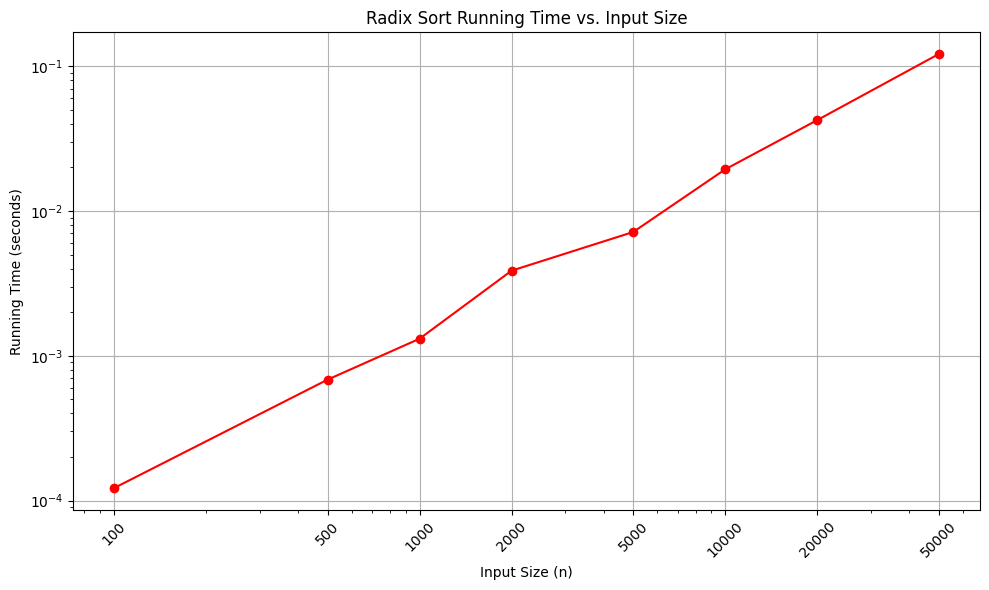

In [5]:
# --- Running Time Measurement ---
print("--- Running Time Measurement ---")
input_sizes = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
running_times = []

# For Radix Sort, the range of values and number of digits matter.
# Let's keep the max value for random numbers relatively stable.
max_value_for_radix = 10000 # Max value, which determines max number of digits

for size in input_sizes:
    # Generate a random list for the current input size
    random_list = [random.randint(0, max_value_for_radix) for _ in range(size)]

    start_time = time.time()
    radix_sort(random_list.copy()) # Use .copy() as radix_sort modifies in-place
    end_time = time.time()

    elapsed_time = end_time - start_time
    running_times.append(elapsed_time)
    print(f"Input Size: {size}, Running Time: {elapsed_time:.6f} seconds")

print("\n")

# --- Plotting Running Time ---
print("--- Plotting Running Time ---")
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, running_times, marker='o', linestyle='-', color='r')
plt.title('Radix Sort Running Time vs. Input Size')
plt.xlabel('Input Size (n)')
plt.ylabel('Running Time (seconds)')
plt.grid(True)
plt.xscale('log') # Use log scale for better visualization
plt.yscale('log') # Use log scale for better visualization
plt.xticks(input_sizes, labels=[str(s) for s in input_sizes], rotation=45)
plt.tight_layout()
plt.show()